In [50]:
import numpy as np
import networkx as nx
import seaborn as sns

# Exploring Different Kernels

Here we construct a basic pipeline of comparing different graph kernels from the [GraKel](https://ysig.github.io/GraKeL/0.1a8/) package. 

First, we load in 32 networks that were generated from MRI scans of mice brains, provided by [Graspologic](https://microsoft.github.io/graspologic/latest/index.html). The mice came from 4 different genotypes, and there were 8 mice per genotype. 

## Load Data

In [51]:
from graspologic.datasets import load_mice
from grakel import Graph

# Load the full mouse dataset
mice = load_mice()

# Stack all adjacency matrices in a 3D numpy array
graphs = np.array(mice.graphs)
print(graphs.shape)

# Convert adjacency matrices to grakel objects
Gs = []
for graph in graphs:
    test = Graph(initialization_object = graph)
    Gs.append(test)

print(len(Gs))

(32, 332, 332)
32


## Calculate Kernel Matrices

We will look at the Random Walk Kernel, Shortest Path Kernel, and the Multiscale Laplacian Kernel.

### Random Walk Kernel
Quantifies similiarity based on the number of common walks between graphs.

In [40]:
from grakel.kernels import RandomWalk

kernel = RandomWalk()
Ks = kernel.fit_transform(Gs)

print(Ks.shape)

(32, 32)


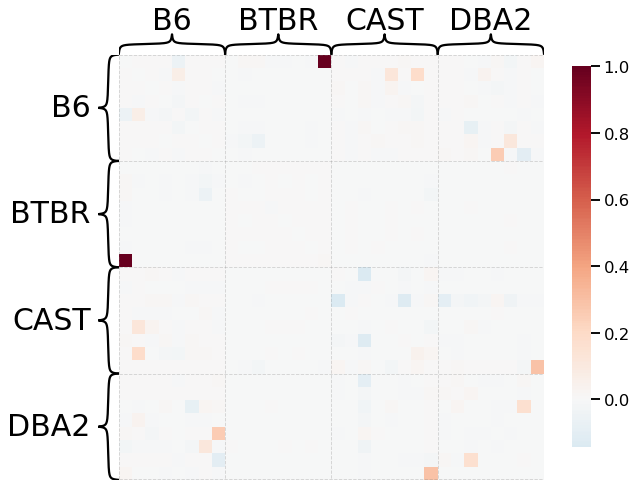

In [41]:
from graspologic.plot import heatmap
scaled_dissimilarity = Ks / np.max(Ks)

_ = heatmap(scaled_dissimilarity, context="talk", inner_hier_labels=mice.labels)

### match nodes before?

### Shortest Path Kernel

In [53]:
from grakel.kernels import ShortestPath

kernel = ShortestPath(with_labels=False)
Ks = kernel.fit_transform(Gs)

print(Ks.shape)

(32, 32)


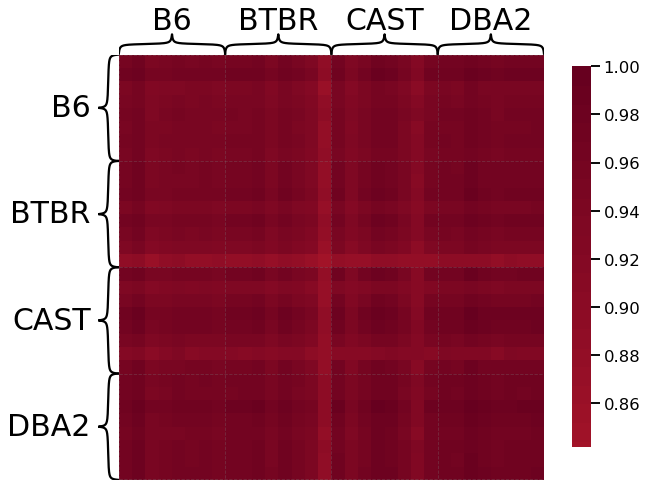

In [54]:
from graspologic.plot import heatmap
scaled_dissimilarity = Ks / np.max(Ks)

_ = heatmap(scaled_dissimilarity, context="talk", inner_hier_labels=mice.labels)

### Multiscale Laplacian Kernel

In [55]:
from grakel.kernels import MultiscaleLaplacian

kernel = MultiscaleLaplacian()
Ks = kernel.fit_transform(Gs)

print(Ks.shape)

ValueError: Graph does not have any labels for vertices.

### From Ben's NDS class [Network Data Science](https://bdpedigo.github.io/networks-course/multiple_embedding.html#representations-for-each-network)

In [45]:
from graspologic.embed import OmnibusEmbed

# Embed using Omni
embedder = OmnibusEmbed(n_elbows=3)
omni_embedding = embedder.fit_transform(graphs)
print(omni_embedding.shape)

(32, 332, 9)


In [46]:
# Create dissimilarity matrix
dissimilarity_matrix = np.zeros((len(graphs), len(graphs)))

for i, embedding1 in enumerate(omni_embedding):
    for j, embedding2 in enumerate(omni_embedding):
        dist = np.linalg.norm(embedding1 - embedding2, ord="fro")
        dissimilarity_matrix[i, j] = dist

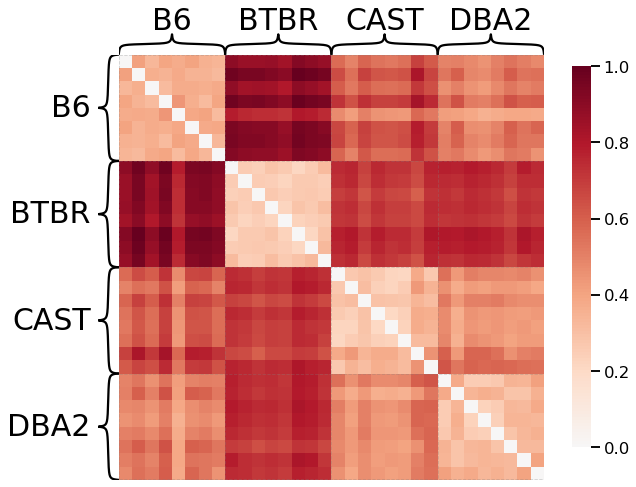

In [48]:
from graspologic.plot import heatmap
scaled_dissimilarity = dissimilarity_matrix / np.max(dissimilarity_matrix)

_ = heatmap(scaled_dissimilarity, context="talk", inner_hier_labels=mice.labels)